# ***Sales Data Analysis of DMART.***

### 📁 Dataset
This project uses the **DMart Sales Data** dataset from Kaggle:
🔗 [DMart Sales Data – Kaggle](https://www.kaggle.com/datasets/nafisansari/dmart-sample-dataset)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv(r'/content/DMart_sample_data.csv')

In [ ]:
df.head()

,Date,Time,CustomerType,ProductCategory,UnitPrice,Quantity,Total,FullName
0,31-12-2023 15:41,06:04:28,Member,Grocery,10.69,4,42.76,Jai Bhatia
1,07-01-2024 22:19,01:05:18,Premium,Home & Kitchen,381.03,3,1143.09,Ishaan Patel
2,10-01-2024 02:09,17:31:43,Regular,Grocery,153.84,5,769.20,Tanvi Iyer
3,01-06-2023 10:46,01:50:16,Regular,Electronics,341.41,4,1365.64,Zara Xavier
4,23-05-2024 22:07,10:37:06,Regular,Home & Kitchen,390.16,5,1950.80,Krishna Zutshi


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Date             1000000 non-null  object 
 1   Time             1000000 non-null  object 
 2   CustomerType     1000000 non-null  object 
 3   ProductCategory  1000000 non-null  object 
 4   UnitPrice        1000000 non-null  float64
 5   Quantity         1000000 non-null  int64  
 6   Total            1000000 non-null  float64
 7   FullName         1000000 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 61.0+ MB


# **Data Cleaning**

In [ ]:
df.isnull().sum()

,0
Date,0
Time,0
CustomerType,0
ProductCategory,0
UnitPrice,0
Quantity,0
Total,0
FullName,0


**Clearly df.isnull().sum() shows that there is no column containing null value therefore we will not perform data cleaning**

In [ ]:
df.shape

(1000000, 8)

In [ ]:
df.describe()

,UnitPrice,Quantity,Total
count,1000000.000000,1000000.000000,1000000.000000
mean,255.134171,2.999324,765.094619
std,141.442440,1.413537,591.113890
min,10.000000,1.000000,10.000000
25%,132.660000,2.000000,290.640000
50%,255.140000,3.000000,604.700000
75%,377.510000,4.000000,1133.160000
max,500.000000,5.000000,2500.000000


# **Data preprocessing**

In [ ]:
def year(str):
  ans=''
  cnt=0
  for s in str:
    cnt+=1
    if (cnt>6) and (cnt<11):
      ans+=s
  return ans

In [ ]:
df['Year']=df['Date'].apply(year)
df['Year'].head()

,Year
0,2023
1,2024
2,2024
3,2023
4,2024


In [ ]:
def month(str):
  ans=''
  cnt=0
  for s in str:
    cnt+=1
    if (cnt>3) and (cnt<6):
      ans+=s
  return ans

In [ ]:
df["Month"]=df["Date"].apply(month)
df['Month'].head()

,Month
0,12
1,01
2,01
3,06
4,05


In [ ]:
monthly_sales=df.groupby(by="Month")['Total'].sum()
monthly_sales

,Total
Month,
01,73146985.57
02,58662915.75
03,63877138.59
04,62297812.42
05,64397449.32
06,61847315.09
07,64318494.91
08,63977578.37
09,62103169.05


# **Data Visualization**

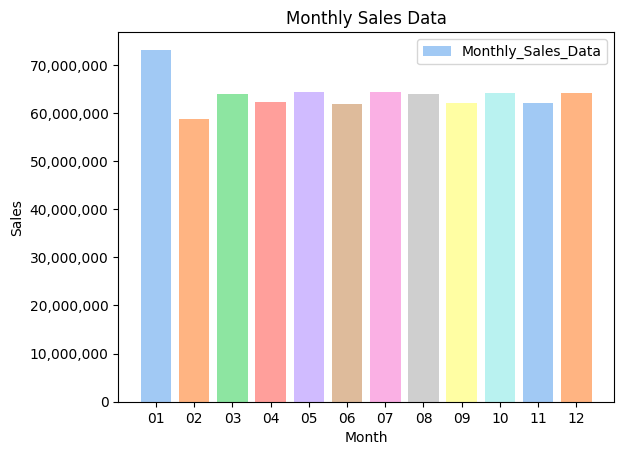

In [ ]:
from matplotlib.ticker import FuncFormatter
colors = sns.color_palette("pastel")
plt.bar(monthly_sales.index, monthly_sales.values,label='Monthly_Sales_Data',color=colors)
# Formating y-axis with commas:-
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Monthly Sales Data")
plt.xticks(rotation=0)
plt.legend()
plt.show()

The above bar plot shows that January experiences the highest sales and February sees the lowest sales. The rest of the year maintains steady and balanced sales performance.

In [ ]:
yearly_sales=df.groupby(by='Year')['Total'].sum()
yearly_sales

,Total
Year,
2023,3.773263e+08
2024,3.788155e+08
2025,8.952815e+06


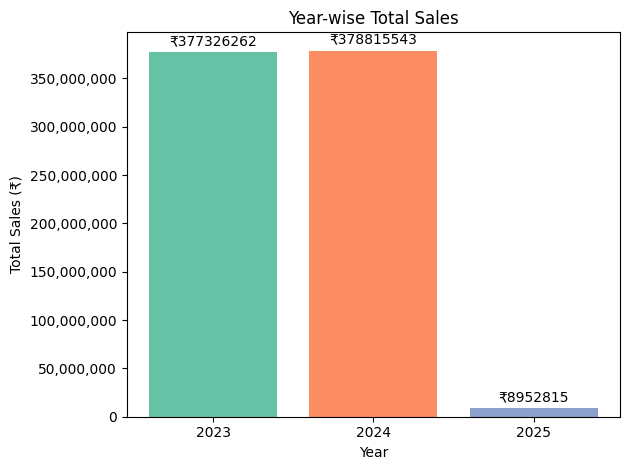

In [ ]:
colors = sns.color_palette("Set2")
ax=plt.bar(yearly_sales.index.astype(str), yearly_sales.values, color=colors)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.title("Year-wise Total Sales")
plt.xlabel("Year")
plt.ylabel("Total Sales (₹)")
plt.tight_layout()
bars = plt.bar(yearly_sales.index, yearly_sales.values, color=colors)
plt.bar_label(bars, fmt='₹%0.0f', padding=3)
plt.show()

Above plot shows that the total sales in 2024 slightly increased compared to 2023, indicating a positive growth trend in annual revenue for DMart and as we don't have whole 2025 data so we can't compare  its sales with year 2023 and 2024

In [ ]:
df['CustomerType'].unique()

array(['Member', 'Premium', 'Regular'], dtype=object)

In [ ]:
df.head()

,Date,Time,CustomerType,ProductCategory,UnitPrice,Quantity,Total,FullName
0,31-12-2023 15:41,06:04:28,Member,Grocery,10.69,4,42.76,Jai Bhatia
1,07-01-2024 22:19,01:05:18,Premium,Home & Kitchen,381.03,3,1143.09,Ishaan Patel
2,10-01-2024 02:09,17:31:43,Regular,Grocery,153.84,5,769.20,Tanvi Iyer
3,01-06-2023 10:46,01:50:16,Regular,Electronics,341.41,4,1365.64,Zara Xavier
4,23-05-2024 22:07,10:37:06,Regular,Home & Kitchen,390.16,5,1950.80,Krishna Zutshi


In [ ]:
# Frequency of the Various Types of customer that purchase products from DMart

In [ ]:
frequency=df.groupby('CustomerType')['CustomerType'].count()
frequency

,CustomerType
CustomerType,
Member,333408
Premium,333480
Regular,333112


Text(0.5, 1.0, 'Frequency of purchases by customer types')

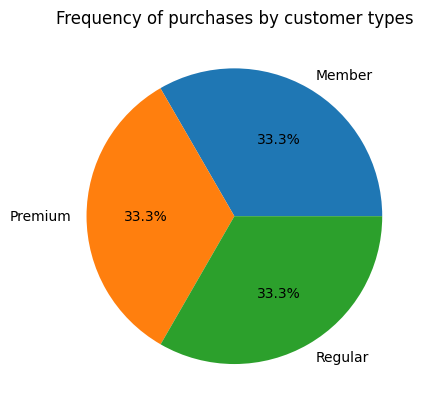

In [ ]:
plt.pie(frequency.values,labels=frequency.index,autopct='%1.1f%%')
plt.title("Frequency of purchases by customer types")

Above pie chart shows that no customer type dominates sales — DMart is catering equally well to all types of customers.

# Which Type of customer contributes more to the sales.

In [ ]:
sales=df.groupby(by="CustomerType")['Total'].sum()
sales

/tmp/ipython-input-146-3329120255.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(sales,palette="Set2")


[Text(0, 0, '255,028,823'),
 Text(0, 0, '255,281,284'),
 Text(0, 0, '254,784,510')]

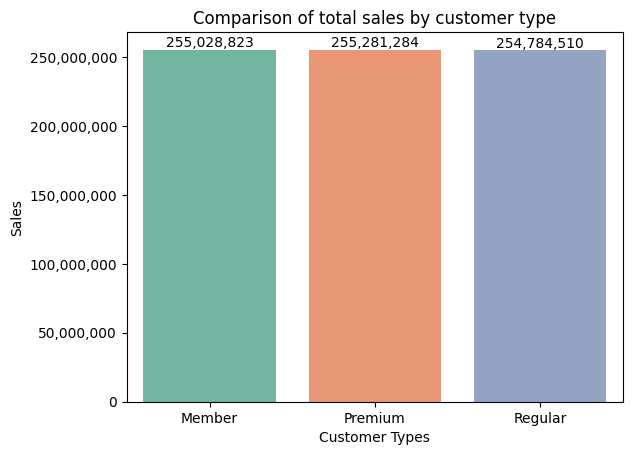

In [ ]:
ax=sns.barplot(sales,palette="Set2")
plt.title("Comparison of total sales by customer type")
plt.xlabel("Customer Types")
plt.ylabel("Sales")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
ax.bar_label(bars, labels=[f'{int(bar.get_height()):,}' for bar in bars])

Above barplot shows that sales generated from Premium Customers and Members are almost equal and slighlty higher than Regular Customers

In [ ]:
df.head()

,Date,Time,CustomerType,ProductCategory,UnitPrice,Quantity,Total,FullName,Year,Month
0,31-12-2023 15:41,06:04:28,Member,Grocery,10.69,4,42.76,Jai Bhatia,2023,12
1,07-01-2024 22:19,01:05:18,Premium,Home & Kitchen,381.03,3,1143.09,Ishaan Patel,2024,01
2,10-01-2024 02:09,17:31:43,Regular,Grocery,153.84,5,769.20,Tanvi Iyer,2024,01
3,01-06-2023 10:46,01:50:16,Regular,Electronics,341.41,4,1365.64,Zara Xavier,2023,06
4,23-05-2024 22:07,10:37:06,Regular,Home & Kitchen,390.16,5,1950.80,Krishna Zutshi,2024,05


# Product Category wise sales

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Beauty & Personal Care'),
  Text(1, 0, 'Clothing'),
  Text(2, 0, 'Electronics'),
  Text(3, 0, 'Grocery'),
  Text(4, 0, 'Home & Kitchen')])

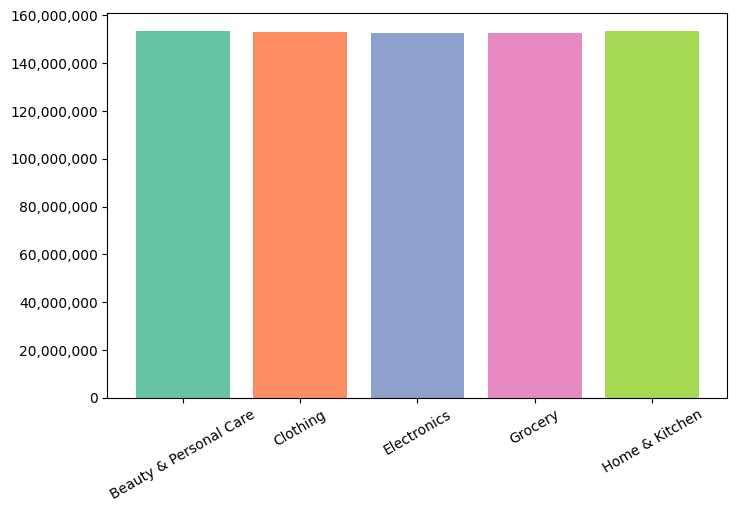

In [ ]:
fig=plt.figure(figsize=(8,5))
product_wise_sales=df.groupby(by="ProductCategory")['Total'].sum()
product_wise_sales
# plt.pie(product_wise_sales,autopct="%1.1f%%")\
colors = sns.color_palette("Set2")
ax=plt.bar(product_wise_sales.index,product_wise_sales.values,color=colors)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xticks(rotation=30)

# **Comparing Number of customers increased or decreased for each Product category from year 2023 to 2024**

In [ ]:
year_wise_data=df.groupby(by=["Year","ProductCategory"]).size().reset_index(name="count")
year_wise_data["Year"]=year_wise_data["Year"].astype(int)
year_wise_data["Year"].dtype
year_wise_data=year_wise_data[year_wise_data["Year"]!=2025]
year_wise_data

,Year,ProductCategory,count
0,2023,Beauty & Personal Care,98693
1,2023,Clothing,98402
2,2023,Electronics,98135
3,2023,Grocery,98452
4,2023,Home & Kitchen,98776
5,2024,Beauty & Personal Care,98826
6,2024,Clothing,99141
7,2024,Electronics,99627
8,2024,Grocery,98864
9,2024,Home & Kitchen,99276


<Figure size 1200x600 with 0 Axes>

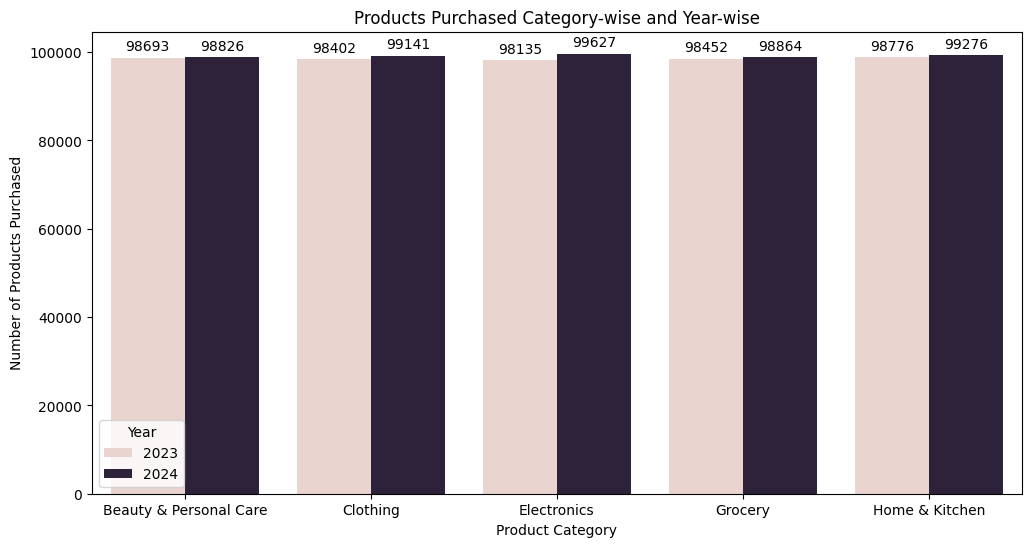

In [ ]:
plt.figure(figsize=(12, 6))
# Create the plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=year_wise_data, x='ProductCategory', y='count', hue='Year')

# Add bar labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)
plt.title('Products Purchased Category-wise and Year-wise')
plt.xlabel('Product Category')
plt.ylabel('Number of Products Purchased')
plt.legend(title='Year')
plt.show()


In Above Bar graph each product category seems to have a slightly higher count in 2024 than in 2023 which shows overall growth and "Home & Kitchen" products appears to have the highest purchases both years.